<a href="https://colab.research.google.com/github/bhardes1/testRepo/blob/master/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# this sets some style parameters
sns.set()

# Download in the data if it's not already there
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

# Read in the data and display a few rows
dat = pd.read_csv("kirby21.csv")
dat.loc[dat.roi == 'Telencephalon_L']

dat.head(4)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519


#**1. Fit a model to the kirby 21 dataset into colab. Do a scatterplot of the left telencephalon (type 1 level 1) volume by the right**

Text(0.5, 1.0, 'Telencephalon Volume')

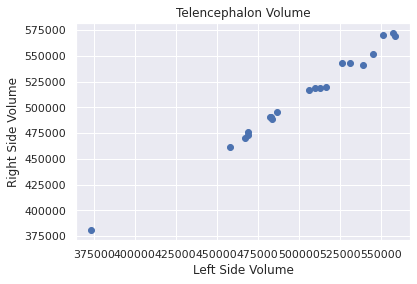

In [9]:
# Extract the Type 1 Level 1 data from Left Telencephalon
t1l1_TelL = dat.loc[(dat.type == 1) & (dat.level == 1) & (dat.roi == 'Telencephalon_L')]
t1l1_TelL.reset_index(drop=True, inplace=True)
# Extract the Type 1 Level 1 data from Right Telencephalon
t1l1_TelR = dat.loc[(dat.type == 1) & (dat.level == 1) & (dat.roi == 'Telencephalon_R')]
t1l1_TelR.reset_index(drop=True, inplace=True)

# Create a scatter plot
plt.plot(t1l1_TelL.volume, t1l1_TelR.volume, 'o')

plt.xlabel('Left Side Volume')
plt.ylabel('Right Side Volume')
plt.title('Telencephalon Volume')

#**2. Create a vector of the left telencelphalon (type 1 level 1) volume values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor**

b is: 1.044242


Text(0.5, 1.0, 'Telencephalon Volume: Left Predictor')

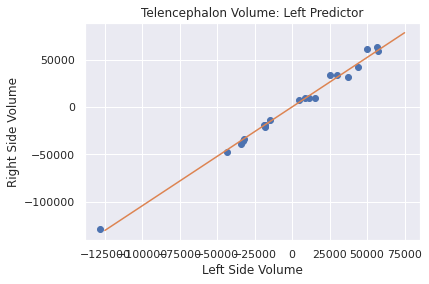

In [10]:
## The left as the predictor (x), right as the outcome (y).
# Create a vector of the left telencelphalon (type 1 level 1) volume values
x_L = t1l1_TelL.volume

# Create a vector of the right telencelphalon (type 1 level 1) volume values
y_R = t1l1_TelR.volume

#  Demean x and y
x = x_L - np.mean(x_L)
y = y_R - np.mean(y_R)

plt.plot(x, y, 'o')
b = sum(y * x) / sum(x ** 2 )
t = np.array([-125000, 75000])
plt.plot(t, t * b)

print("b is: %f" %b)

plt.xlabel('Left Side Volume')
plt.ylabel('Right Side Volume')
plt.title('Telencephalon Volume: Left Predictor')

#**Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot.**

b is: 0.950055


Text(0.5, 1.0, 'Telencephalon Volume: Right Predictor')

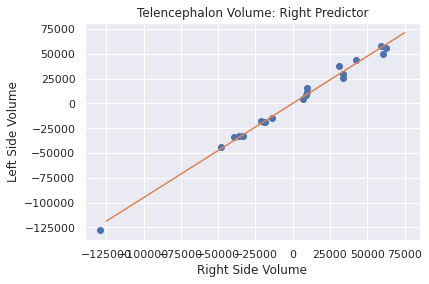

In [11]:
## The left as the predictor, right as the outcome.
# Create a vector of the left telencelphalon (type 1 level 1) volume values
y_L = t1l1_TelL.volume

# Create a vector of the right telencelphalon (type 1 level 1) volume values
x_R = t1l1_TelR.volume

#  Demean x and y
x = x_R - np.mean(x_R)
y = y_L - np.mean(y_L)

plt.plot(x, y, 'o')
b = sum(y * x) / sum(x ** 2 )
t = np.array([-125000, 75000])
plt.plot(t, t * b)

print("b is: %f" %b)
plt.xlabel('Right Side Volume')
plt.ylabel('Left Side Volume')
plt.title('Telencephalon Volume: Right Predictor')

#**3. Consider a regression through the origin model  𝑌=𝐵𝑋 . What would be the impact on the estimate of  𝐵  if we replaced  𝑋  by  𝑐𝑋  where  𝑐  is a positive constant?**
##b would reduce by a factor of 1/c

#**4. Let $X_i$ be a group indicator so that**
$$
x_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
**If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that
$\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$.**


Consider a $y$ vector and an $x$ vector that is a colleciton of $1$s and $0$s (corresponding to group 1 and group 0, respectively).

Let $n_1$, $n_0$  be the number in group 1, 0 and $n=n_1 + n_0$.  Let $p_1$ be the fraction of observations in group 1, i.e. $n_1 / n$ and $p_0 = n_0 / n$ be the fraction of observations in group 0. Let $\bar y_1$ and $\bar y_0$ be the means of $y$ in each group and $\bar y$ be the overall mean of the $y$. 

The following are pretty easy to show:
* $\bar x = p_1$
$$\bar x = \frac {1}{n} \sum_{i = 1}^n x_i = \frac{n_1}{n} = p_1$$
* $\bar y = p_1 \bar y_1 + p_0 \bar y_0$
$$
$$
If we know the means of group 0 and group 1, the overal mean of y can be found by multiplying the means by each of their percent contributions to the total y vector. Thus giving us: 
$$\bar y = p_1 \bar y_1 + p_0 \bar y_0$$
* $\sum_{i=1}^n (x_i - p_1)^2 = n_1 p_0^2 + n_0 p_1 ^2 = n p_1 p_0 $
$$$$Can be expanded to 
$$ \sum_{i=1}^n (x_i - p_1)^2 = \sum_{i=1}^n (x_i)^2  2\sum_{i=1}^n (x_ip_1) + \sum_{i=1}^n p_1^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \sum_{i=1}^n (x_i)^2 - 2p_1(p_1)(n_0 + n_1) + n p_1^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \sum_{i=1}^n (x_i)^2 - (n_0 + n_1) p_1^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = n_1 - (n_0 + n_1) p_1^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \frac{n^2*n_1}{n} - (n_0 + n_1) p_1^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \frac{(n_1+n_0)^2*n_1}{n^2} - (n_0 + n_1) p_1^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \frac{({n_1}^2+2n_1n_0+{n_0}^2)n_1}{n^2} - (n_0 + n_1) p_1^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = n_1{p_1}^2+2n_0{p_1}^2+n_1{p_0}^2-n_0{p_1}^2-n_1{p_1}^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = n_1 p_0^2 + n_0 p_1 ^2$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \frac{{n_1}^2n_0}{n^2} + \frac{{n_0}^2n_1}{n^2}$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \frac{{n_1}^2n_0+{n_0}^2n_1}{n^2}$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \frac{n_0({n_1}^2+{n_0}n_1)}{n^2}$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = \frac{p_0n_1({n_1}+{n_0})}{n}$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = {p_0p_1({n_1}+{n_0})}$$
$$ \sum_{i=1}^n (x_i - p_1)^2 = n p_1 p_0$$

We want to show that $\hat \beta_0 = \bar y_0$ and $\hat \beta_0 + \hat \beta_1 = \bar y_1$.
However, we know that $\hat \beta_0 = \bar y - \hat \beta_1 \bar x $. So, it must be the case that $\bar y_0 = \bar y - \hat \beta_1 \bar x$. Plugging in our existing results, we get that
$$
\hat \beta_1 = \bar y_1 - \bar y_0.
$$
It's easy to then check that if this is $\hat \beta_1$ then the problem is solved.  So, if we can show that, we're done.

Let $G_1$ and $G_0$ be the indices for groups 1 and 0. Consider:
$$
\begin{align}
\hat \beta_1 & = \frac{\sum_{i=1}^n (y_i - \bar y) (x_i - p_1)}{\sum_{i=1}^n (x_i - p_1)^2}\\
& = \frac{\sum_{i\in G_1}^n (y_i - \bar y) (x_i - p_1) + \sum_{i\in G_0}^n (y_i - \bar y) (x_i - p_1)}{n p_1 p_0} \\
\end{align}$$
Given $x_1 = 1$ and $x_0 = 0$
$$
\begin{align}
& = \frac{(x_1 - p_1)\sum_{i\in G_1}^n (y_i - \bar y)  + (x_0 - p_1)\sum_{i\in G_0}^n (y_i - \bar y) }{n p_1 p_0} \\
& = \frac{(p_0)\sum_{i\in G_1}^n (y_i - \bar y)  + (- p_1)\sum_{i\in G_0}^n (y_i - \bar y) }{n p_1 p_0} \\
& = \frac{(p_0) n_1 (\bar y_1 - \bar y)  + (- p_1)n_0 (\bar y_0 - \bar y)}{n p_1 p_0} \\
& = \frac{n_1 \bar y_1 p_0 - n_1\bar y p_0 - n_0 \bar y_0 p_1 + n_0 \bar y p_1}{n p_1 p_0} \\
& = \frac{n_1 \bar y_1 p_0 - n_1\bar y p_0 - n_0 \bar y_0 p_1 + n_0 \bar y p_1}{n p_1 p_0} \\
& = \frac{n_1 \bar y_1 p_0 }{n p_1 p_0} - \frac{n_1\bar y p_0 }{n p_1 p_0} - \frac{n_0 \bar y_0 p_1}{n p_1 p_0} + \frac{n_0 \bar y p_1}{n p_1 p_0}\\
& = \bar y_1 - \bar y - \bar y_0 + \bar y \\
& = \bar y_1 - \bar y_0 
\end{align}
$$




#**5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression.**

In [12]:
def regression_values(x, y):

## get the slope on the data
  beta1 = st.pearsonr(x, y)[0] * np.std(y) / np.std(x)
  beta0 = np.mean(y) - np.mean(x) * beta1
  return([beta0, beta1])

#**6. Consider the Kirby 21 data. Plot a scatter plot of the left diencephalon (type 1 level 1) and the right. Find the best line fit for predicting the right using the left. Plot the line on the scatterplot. Find the best fit line for predicting the left using the right as a predictor. Plot this on the same plot.**

For Left as the predictor: B0 = 1267.747865 and B1 = 0.868142
For Right as the predictor: B0 = -694.180922 and B1 = 1.067568


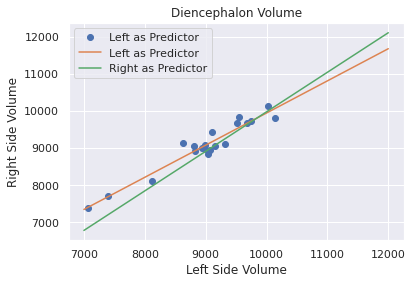

In [13]:
# Extract the Type 1 Level 1 data from Left Diencephalon
t1l1_DienL = dat.loc[(dat.type == 1) & (dat.level == 1) & (dat.roi == 'Diencephalon_L')]
t1l1_DienL.reset_index(drop=True, inplace=True)
# Extract the Type 1 Level 1 data from Right Diencephalon
t1l1_DienR = dat.loc[(dat.type == 1) & (dat.level == 1) & (dat.roi == 'Diencephalon_R')]
t1l1_DienR.reset_index(drop=True, inplace=True)

# Create a vector of the left Diencephalon (type 1 level 1) volume values
y_L = t1l1_DienL.volume
x_L = t1l1_DienL.volume

# Create a vector of the right Diencephalon (type 1 level 1) volume values
y_R = t1l1_DienR.volume
x_R = t1l1_DienR.volume

plt.plot(x_L, y_R, 'o')
t = np.array([7000, 12000])

# Line of best fit for predicting the right using the left
beta_val_L = regression_values(x_L, y_R)

reg_line_L = beta_val_L[0] + beta_val_L[1] * t;
plt.plot(t, reg_line_L)

# Line of best fit for predicting the left using the right
beta_val_R = regression_values(x_R, y_L)

reg_line_R = beta_val_R[0] + beta_val_R[1] * t;
plt.plot(t, reg_line_R)
plt.legend(['Left as Predictor', 'Left as Predictor', 'Right as Predictor'])

plt.xlabel('Left Side Volume')
plt.ylabel('Right Side Volume')
plt.title('Diencephalon Volume')

print('For Left as the predictor: B0 = %f and B1 = %f' %(beta_val_L[0], beta_val_L[1]))
print('For Right as the predictor: B0 = %f and B1 = %f' %(beta_val_R[0], beta_val_R[1]))

#**7. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation.**

##To find a regression line, we use the formula 
##$$\hat \beta_0 = \bar Y - \bar X \hat \beta_1$$
##Pearon Correlation is defined as: 
##$$\frac{Cov(X, Y)}{SD_X \times SD_Y}$$
##where:$$Cov(X,Y) = \sum_{i=1}^n (Y_i - \bar Y) (X_i - \bar X) / (N-1)$$
##We know,
##$$\hat \beta_1 = Cor(X, Y) \frac{SD_Y}{SD_X}$$
$$and$$
##$$\hat \beta_1 = \frac{\sum_{i=1}^n (Y_i - \bar Y) (X_i - \bar X)}{\sum_{i=1}^n (X_i - \bar X)^2} $$
##However, if we divide $\bar Y$ and $\bar X$ by their respective standard deviations, we find
##$$\hat \beta_1 = \frac{\sum_{i=1}^n (Y_i - \bar Y) (X_i - \bar X)}{\sum_{i=1}^n (X_i - \bar X)^2} \frac{SD_X}{SD_Y}$$

##$$\hat \beta_1 = Cor(X, Y) \frac{SD_Y}{SD_X}\frac{SD_X}{SD_Y}$$

##Thus, $$\hat \beta_1 = Cor(X, Y)$$